<a href="https://colab.research.google.com/github/SylvanasBV/Computacion_cientifica-y-analitica/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 1 - ANDRES FELIPE BARBOSA SALAMANCA




or the operation of this activity, please instantiate the three files locally in the colab by clicking on **upload to session storage** in the left section called **Files** of which 3 were selected, which are:  [sexual offenses](https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delitos-sexuales-Polic-a-Nacional/fpe5-yrmw), 
[domestic violence](https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delito-Violencia-Intrafamiliar-Polic-a-Nac/vuyt-mqpw),
[Homicide](https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Homicidios-y-Homicidios-accidente-de-tr-ns/ha6j-pa2r)




In [ ]:
!pip install -q xlrd
!git clone https://github.com/fastai/courses.git

Cloning into 'courses'...
remote: Enumerating objects: 769, done.
remote: Total 769 (delta 0), reused 0 (delta 0), pack-reused 769
Receiving objects: 100% (769/769), 23.06 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (409/409), done.


**bookstores**

In [ ]:
# I import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**datasets**

National Police sexual crimes report

---



In [ ]:
# Loading the file as a dataframe
# Homicide National Police sexual crimes report
df_RDS = pd.read_csv("/content/Reporte__Delitos_sexuales_Polic_a_Nacional.csv", delimiter=',')
# Mostrar las dimenciones del dataframe
print(df_RDS.shape)
# Delete records with NAN
df_RDS = df_RDS.dropna()
# change the Dane Code to an INT
df_RDS["CODIGO DANE"] = df_RDS["CODIGO DANE"].astype(int)
# I convert the type of column DATE ECHO to date and I put a specific format 
df_RDS["FECHA HECHO"] = pd.to_datetime(df_RDS["FECHA HECHO"], format="%d/%m/%Y")
# Corregir mala escritura del dataset
v_flag = df_RDS["GRUPO ETARIO"] == "ADOLESCENTES"
df_RDS.loc[v_flag,'GRUPO ETARIO'] = "ADOLECENTES"
# Get names of indexes for which column Stock has value No
indexNames = df_RDS[ df_RDS['CODIGO DANE'] == 'NO REPORTA' ].index
# Delete these row indexes from dataFrame
df_RDS.drop(indexNames , inplace=True)
# Checking the data types of the columns
print(df_RDS.dtypes)
# Printing the first 10 records
print(df_RDS.head(10))

(252334, 9)
DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
delito                  object
dtype: object
   DEPARTAMENTO           MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0       CAQUETÁ              SOLANO     18756000  ARMA BLANCA / CORTOPUNZANTE   
1       BOLÍVAR      CARTAGENA (CT)     13001000  ARMA BLANCA / CORTOPUNZANTE   
2         HUILA            LA PLATA     41396000  ARMA BLANCA / CORTOPUNZANTE   
3     SANTANDER         PIEDECUESTA     68547000                 CONTUNDENTES   
4          META  VILLAVICENCIO (CT)     50001000                 CONTUNDENTES   
5       BOLÍVAR      CARTAGENA (CT)     13001000                 CONTUNDENTES   
6  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   
7        BOYACÁ                PAYA     1553300

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value



---




Homicides traffic accident National Police


---




In [ ]:
# Loading the file as a dataframe
# National Police Traffic Accident Homicide Report
df_HAT = pd.read_csv("/content/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv", delimiter=',')
# Show the dimensions of the dataframe
print(df_HAT.shape)
# Delete records with NAN
df_HAT = df_HAT.dropna()
# Changed the column type DATE ECHO to date
df_HAT["FECHA HECHO"] = pd.to_datetime(df_HAT["FECHA HECHO"], format="%d/%m/%Y")
# Checking the data types of the columns
print(df_HAT.dtypes)
# Printing the first 10 records
print(df_HAT.head(10))

(57734, 9)
DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARÍO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
dtype: object
  DEPARTAMENTO          MUNICIPIO  CODIGO DANE ARMAS MEDIOS FECHA HECHO  \
0    ANTIOQUIA            LA CEJA      5376000         MOTO  2010-01-01   
1    ATLÁNTICO  BARRANQUILLA (CT)      8001000         MOTO  2010-01-01   
2    ATLÁNTICO            LURUACO      8421000         MOTO  2010-01-01   
3      CAQUETÁ        PUERTO RICO     18592000         MOTO  2010-01-01   
4     CASANARE            AGUAZUL     85010000         MOTO  2010-01-01   
5        CESAR    AGUSTÍN CODAZZI     20013000         MOTO  2010-01-01   
6      GUAJIRA      RIOHACHA (CT)     44001000         MOTO  2010-01-01   
7        HUILA          



---



Report of personal injuries and a traffic accident

---





In [ ]:
# Loading the file as a dataframe
# Report of personal injuries and a traffic accident
df_LSYAT = pd.read_csv("/content/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv", delimiter=',')
# Show the dimensions of the dataframe
print(df_LSYAT.shape)
# Delete records with NAN
df_LSYAT = df_LSYAT.dropna()
# Get names of indexes for which column Stock has value No
indexNames = df_LSYAT[ df_LSYAT['CODIGO DANE'] == 'NO REPORTA' ].index
# Delete these row indexes from dataFrame
df_LSYAT.drop(indexNames , inplace=True)
# Try to read the code and change the Dane Code to an INT
df_LSYAT["CODIGO DANE"] = df_LSYAT["CODIGO DANE"].astype(int)
# Changed the column type DATE ECHO to date
df_LSYAT["FECHA HECHO"] = pd.to_datetime(df_LSYAT["FECHA HECHO"], format="%d/%m/%Y")
# Checking the data types of the columns
print(df_LSYAT.dtypes)
# Printing the first 10 records
print(df_LSYAT.head(10))



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARIO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
dtype: object
  DEPARTAMENTO          MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0    ANTIOQUIA          GIRARDOTA      5308000  ARMA BLANCA / CORTOPUNZANTE   
1    ANTIOQUIA          GIRARDOTA      5308000  ARMA BLANCA / CORTOPUNZANTE   
2    ANTIOQUIA             MUTATÁ      5480000  ARMA BLANCA / CORTOPUNZANTE   
3    ANTIOQUIA            NECOCLÍ      5490000  ARMA BLANCA / CORTOPUNZANTE   
4    ATLÁNTICO  BARRANQUILLA (CT)      8001000  ARMA BLANCA / CORTOPUNZANTE   
5    ATLÁNTICO  BARRANQUILLA (CT)      8001000  ARMA BLANCA / CORTOPUNZANTE   
6    ATLÁNTICO             GALAPA      8296000  ARMA BLANCA / CORTOPUNZANTE   
7  

### **Which departments (TOP 3) have been most affected historically and in the last year?**

National Police sexual crimes report

---



NIVEL HISTORICO


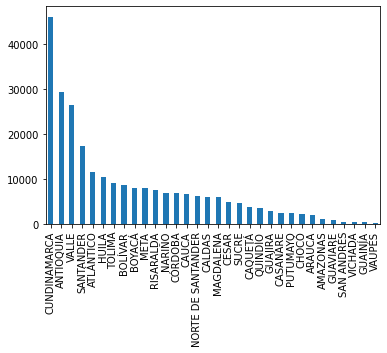

In [ ]:
# Repainting the frequency of positions using a bar chart
print("NIVEL HISTORICO")
df_RDS["DEPARTAMENTO"].value_counts().plot(kind = "bar")

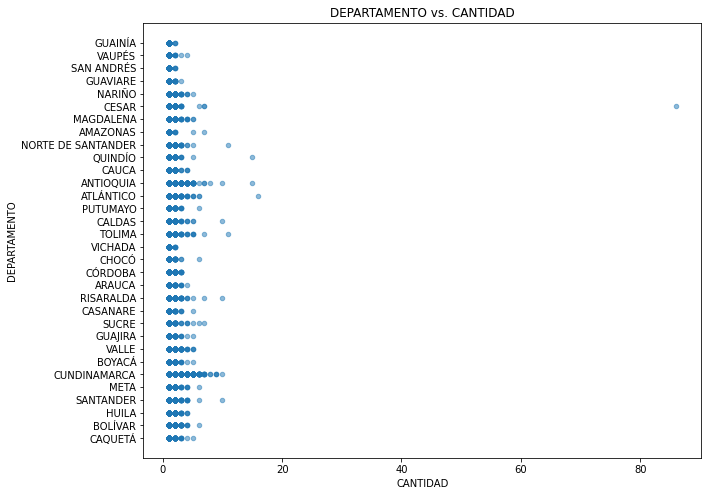

In [ ]:
# Plotting the relationship between QUANTITY and DEPARTMENT
plt.figure(figsize=(10,8))
plt.scatter(df_RDS["CANTIDAD"], df_RDS["DEPARTAMENTO"],alpha = 0.5,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

As can be seen in the graph, the TOP 3 departments with the highest number of Personal Injuries and Traffic Accidents are:
1. CUNDINAMARCA
2. ANTIOQUA
3. VALLE

According to the frequency table, but the second table seems to me to be the best, which represents a top as such, but certain similarities are perceived, I don't know because of the caesar, which has an unrealistic amount.

In [ ]:
print("--------------------------------- LAST YEAR -------------------------------------")
# I create a year column and enter every year to be able to take them easier
df_RDS["YEAR"]=pd.DatetimeIndex(df_RDS["FECHA HECHO"]).year
# Printing the first 10 records
print(df_RDS.head(10))

--------------------------------- LAST YEAR -------------------------------------
   DEPARTAMENTO           MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0       CAQUETÁ              SOLANO     18756000  ARMA BLANCA / CORTOPUNZANTE   
1       BOLÍVAR      CARTAGENA (CT)     13001000  ARMA BLANCA / CORTOPUNZANTE   
2         HUILA            LA PLATA     41396000  ARMA BLANCA / CORTOPUNZANTE   
3     SANTANDER         PIEDECUESTA     68547000                 CONTUNDENTES   
4          META  VILLAVICENCIO (CT)     50001000                 CONTUNDENTES   
5       BOLÍVAR      CARTAGENA (CT)     13001000                 CONTUNDENTES   
6  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   
7        BOYACÁ                PAYA     15533000                 CONTUNDENTES   
8  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   
9  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   

  FECHA HECHO     GENERO G

--------------------------------LAST YEAR------------------------------------


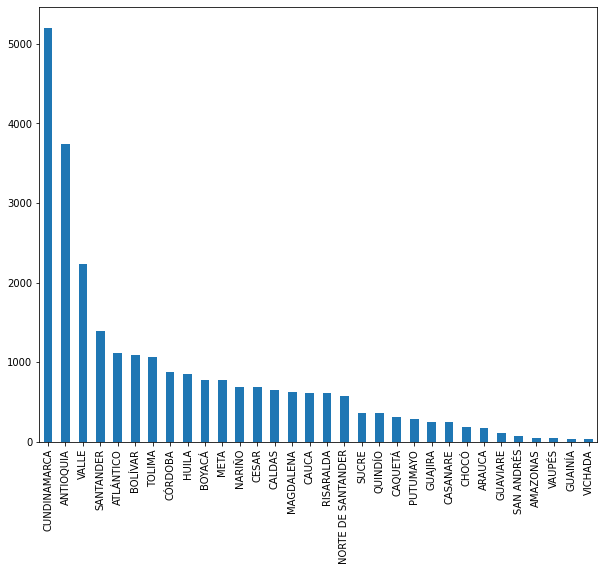

In [ ]:
# Check what is the last year
maximum = np.max(df_RDS["YEAR"])
print("--------------------------------LAST YEAR------------------------------------")
plt.figure(figsize=(10,8))
# Generate a list with only the year 2021
df_RDS2021 = df_RDS.loc[df_RDS["YEAR"] == 2021]
# Repainting the frequency of positions using a bar chart as a better visualization alternative
df_RDS2021["DEPARTAMENTO"].value_counts().plot(kind = "bar")

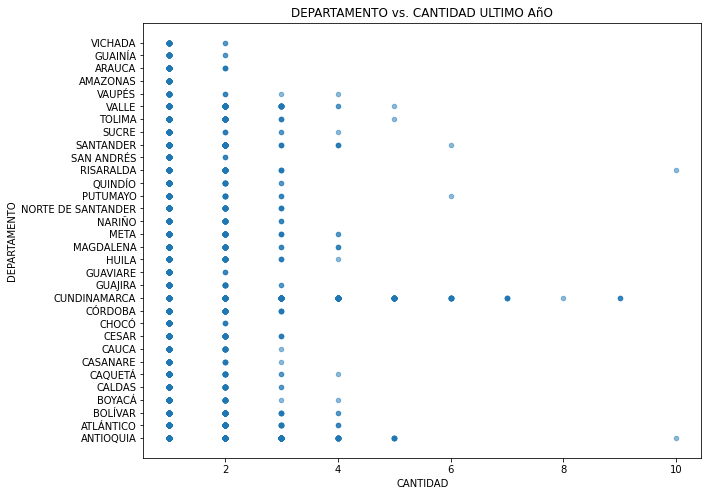

In [ ]:
plt.figure(figsize=(10,8))
# Plotting the relationship between QUANTITY and DEPARTMENT
plt.scatter(df_RDS2021["CANTIDAD"], df_RDS2021["DEPARTAMENTO"],alpha = 0.5,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD ULTIMO AñO")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

THE TOP 3 OF THE LAST YEAR IS:
1. CUNDINAMARCA
2. ANTIOQUIA
3. VALLE



---




Report of personal injuries and a traffic accident

---







NIVEL HISTORICO


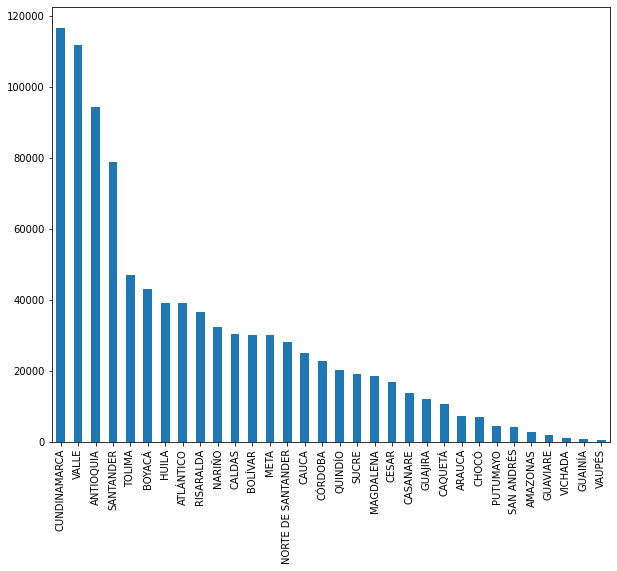

In [ ]:
print("NIVEL HISTORICO")
plt.figure(figsize=(10,8))
# Repainting the frequency of positions using a bar chart
df_LSYAT["DEPARTAMENTO"].value_counts().plot(kind = "bar")

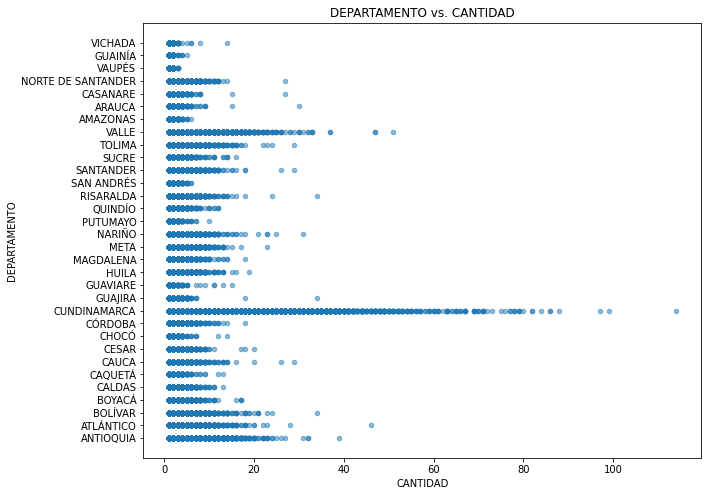

In [ ]:
# Plotting the relationship between QUANTITY and DEPARTMENT
plt.figure(figsize=(10,8))
plt.scatter(df_LSYAT["CANTIDAD"], df_LSYAT["DEPARTAMENTO"],alpha = 0.5,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

As can be seen in the graph, the TOP 3 departments with the highest number of Personal Injuries and Traffic Accidents are:
1. CUNDINAMARCA
2. VALLEY
3. ANTIOQUIA

In [ ]:
print("LAST YEAR")
# I create a year column and enter every year to be able to take them easier
df_LSYAT["YEAR"]=pd.DatetimeIndex(df_LSYAT["FECHA HECHO"]).year
# Printing the first 10 records
print(df_LSYAT.head(10))

LAST YEAR
  DEPARTAMENTO          MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0    ANTIOQUIA          GIRARDOTA      5308000  ARMA BLANCA / CORTOPUNZANTE   
1    ANTIOQUIA          GIRARDOTA      5308000  ARMA BLANCA / CORTOPUNZANTE   
2    ANTIOQUIA             MUTATÁ      5480000  ARMA BLANCA / CORTOPUNZANTE   
3    ANTIOQUIA            NECOCLÍ      5490000  ARMA BLANCA / CORTOPUNZANTE   
4    ATLÁNTICO  BARRANQUILLA (CT)      8001000  ARMA BLANCA / CORTOPUNZANTE   
5    ATLÁNTICO  BARRANQUILLA (CT)      8001000  ARMA BLANCA / CORTOPUNZANTE   
6    ATLÁNTICO             GALAPA      8296000  ARMA BLANCA / CORTOPUNZANTE   
7    ATLÁNTICO            SOLEDAD      8758000  ARMA BLANCA / CORTOPUNZANTE   
8      BOLÍVAR     CARTAGENA (CT)     13001000  ARMA BLANCA / CORTOPUNZANTE   
9       BOYACÁ            SANTANA     15686000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO DESCRIPCIÓN CONDUCTA  CANTIDAD  YEAR  
0  2010-01-01   FEMENINO      ADULTOS  LESI

LAST YEAR


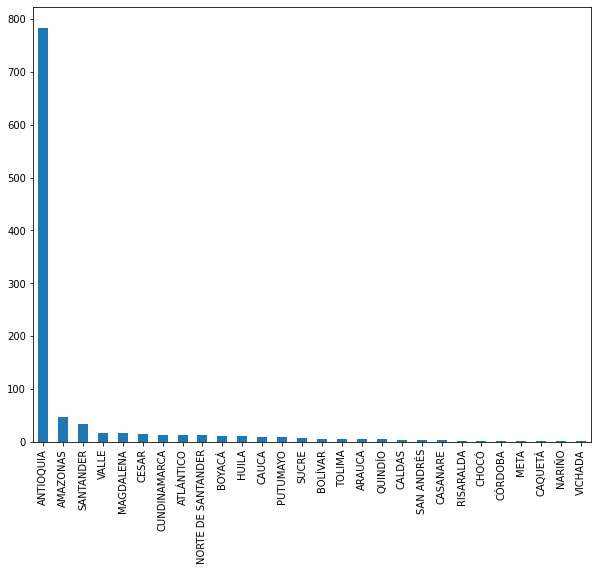

In [ ]:
# Check what is the last year
maximum = np.max(df_LSYAT["YEAR"])
print("LAST YEAR")
plt.figure(figsize=(10,8))
# Generate a list with only the year 2021
df_2021 = df_LSYAT.loc[df_LSYAT["YEAR"] == 2021]
# Repainting the frequency of positions using a bar chart
df_2021["DEPARTAMENTO"].value_counts().plot(kind = "bar")

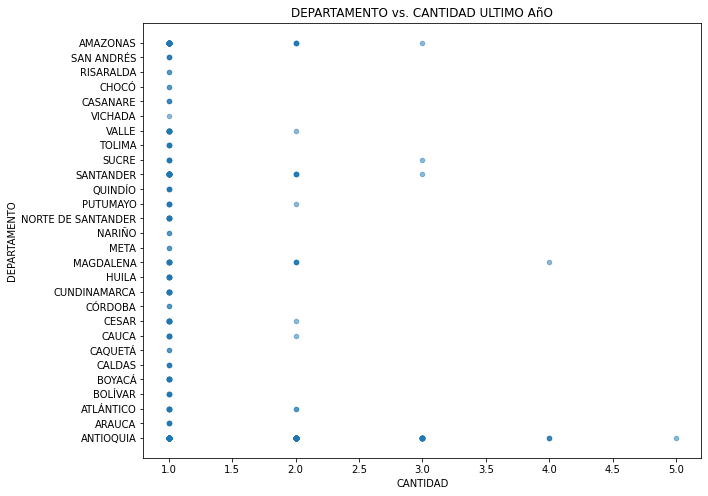

In [ ]:
plt.figure(figsize=(10,8))
# Plotting the relationship between QUANTITY and DEPARTMENT
plt.scatter(df_2021["CANTIDAD"], df_2021["DEPARTAMENTO"],alpha = 0.5,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD ULTIMO AñO")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

THE TOP 3 OF THE LAST YEAR IS:
1. CUNDINAMARCA
2. ANTIOQUIA
3. VALLEY



---



Homicides traffic accident National Police


---




NIVEL HISTORICO


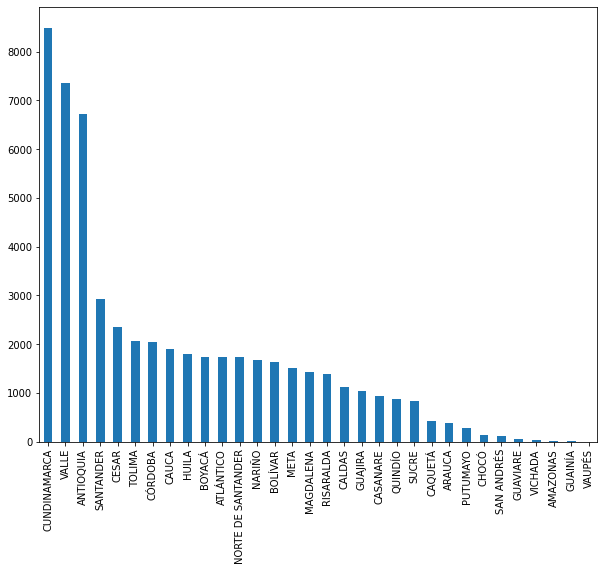

In [ ]:
print("NIVEL HISTORICO")
plt.figure(figsize=(10,8))
# Repainting the frequency of positions using a bar chart
df_HAT["DEPARTAMENTO"].value_counts().plot(kind = "bar")

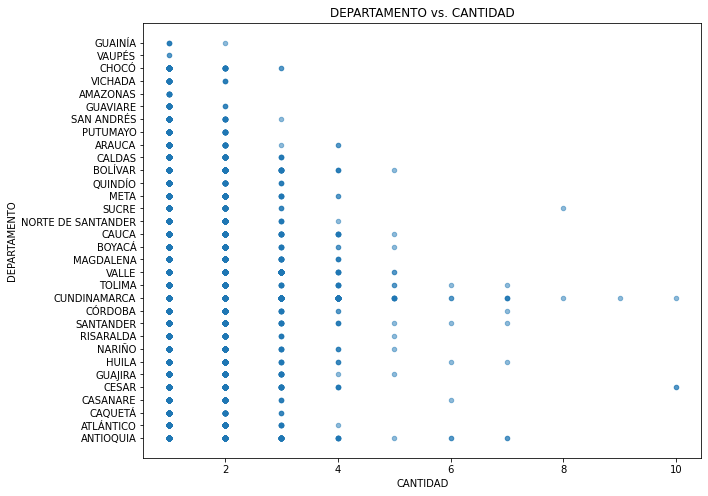

In [ ]:
plt.figure(figsize=(10,8))
# Plotting the relationship between QUANTITY and DEPARTMENT
plt.scatter(df_HAT["CANTIDAD"], df_HAT["DEPARTAMENTO"],alpha = 0.5,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

As can be seen in the graph, the TOP 3 departments with the highest number of National Police traffic accident Homicides are:
1. CUNDINAMARCA
2. VALLE
3. ANTIOQUIA

In [ ]:
print("LAST YEAR")
# I create a year column and enter every year to be able to take them easier
df_HAT["YEAR"]=pd.DatetimeIndex(df_HAT["FECHA HECHO"]).year
# Printing the first 10 records
print(df_HAT.head(10))

LAST YEAR
  DEPARTAMENTO          MUNICIPIO  CODIGO DANE ARMAS MEDIOS FECHA HECHO  \
0    ANTIOQUIA            LA CEJA      5376000         MOTO  2010-01-01   
1    ATLÁNTICO  BARRANQUILLA (CT)      8001000         MOTO  2010-01-01   
2    ATLÁNTICO            LURUACO      8421000         MOTO  2010-01-01   
3      CAQUETÁ        PUERTO RICO     18592000         MOTO  2010-01-01   
4     CASANARE            AGUAZUL     85010000         MOTO  2010-01-01   
5        CESAR    AGUSTÍN CODAZZI     20013000         MOTO  2010-01-01   
6      GUAJIRA      RIOHACHA (CT)     44001000         MOTO  2010-01-01   
7        HUILA              ISNOS     41359000         MOTO  2010-01-01   
8        HUILA         NEIVA (CT)     41001000         MOTO  2010-01-01   
9        HUILA            PALERMO     41524000         MOTO  2010-01-01   

      GENERO  GRUPO ETARÍO                               DESCRIPCIÓN CONDUCTA  \
0  MASCULINO       ADULTOS  ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...   
1 

LAST YEAR


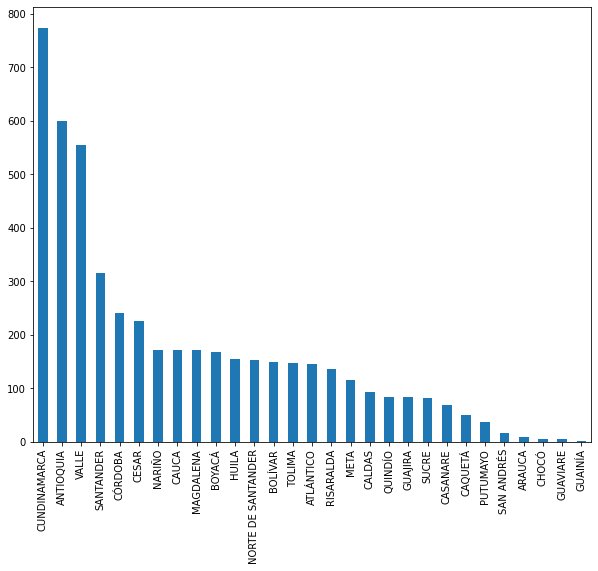

In [ ]:
# Check what is the last year
maximum = np.max(df_HAT["YEAR"])
print("LAST YEAR")

plt.figure(figsize=(10,8))
# Generate a list with only the year 2021
df_HAT_2021 = df_HAT.loc[df_HAT["YEAR"] == 2021]

# Repainting the frequency of positions using a bar chart
df_HAT_2021["DEPARTAMENTO"].value_counts().plot(kind = "bar")

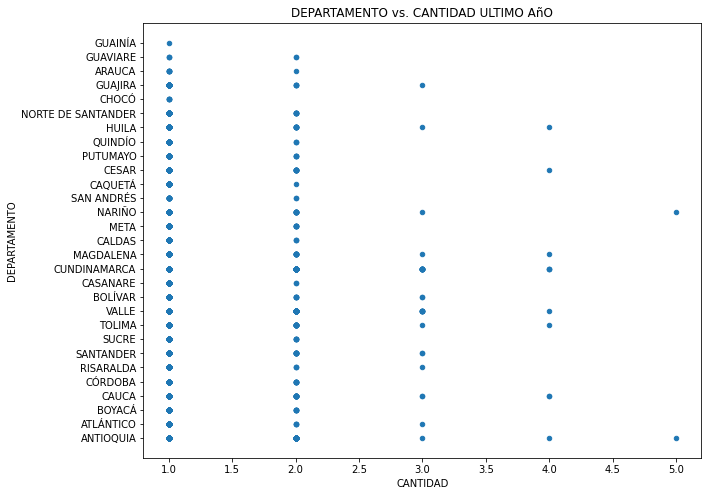

In [ ]:
plt.figure(figsize=(10,8))

# Plotting the relationship between QUANTITY and DEPARTMENT
plt.scatter(df_HAT_2021["CANTIDAD"], df_HAT_2021["DEPARTAMENTO"],alpha = 1,s=20)
plt.title("DEPARTAMENTO vs. CANTIDAD ULTIMO AñO")
plt.xlabel("CANTIDAD")
plt.ylabel("DEPARTAMENTO")
plt.show()

THE TOP 3 OF THE LAST YEAR IS:
1. CUNDINAMARCA
2. ANTIOQUIA
3. VALLE



---



### **What has historically been the most common weapon or means of committing the crime?**


National Police sexual crimes report

---





The fashion of the most used weapon
['SIN EMPLEO DE ARMAS']
FREQUENCY GRAPH


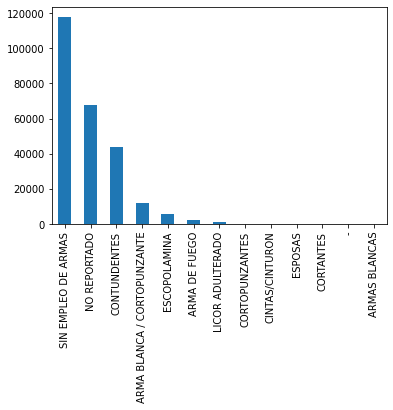

In [ ]:
# Define the fashion

def mode(dataset):
    frequency = {}

    for value in dataset:
        frequency[value] = frequency.get(value, 0) + 1

    most_frequent = max(frequency.values())

    modes = [key for key, value in frequency.items()
                      if value == most_frequent]

    return modes
# determine the mode
print("The fashion of the most used weapon")
print(mode(df_RDS["ARMAS MEDIOS"]))

print("FREQUENCY GRAPH")
# Repainting the frequency of positions using a bar chart
df_RDS["ARMAS MEDIOS"].value_counts().plot(kind = "bar")

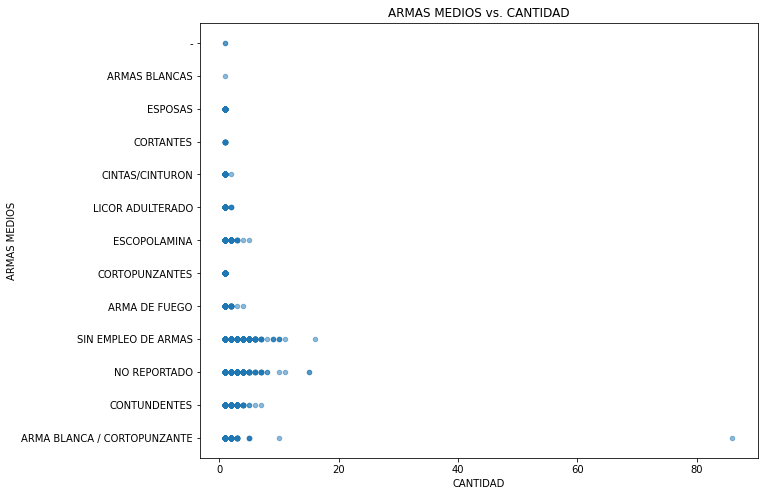

In [ ]:
# Plotting the relationship between QUANTITY and MEANS WEAPONS
plt.figure(figsize=(10,8))
plt.scatter(df_RDS["CANTIDAD"], df_RDS["ARMAS MEDIOS"],alpha = 0.5,s=20)
plt.title("ARMAS MEDIOS vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("ARMAS MEDIOS")
plt.show()

According to the graph, the most used weapon is when a weapon is not used to commit the crime.



---



Report of personal injuries and a traffic accident

---



The fashion of the most used weapon :
['CONTUNDENTES']
FREQUENCY DIAGRAM


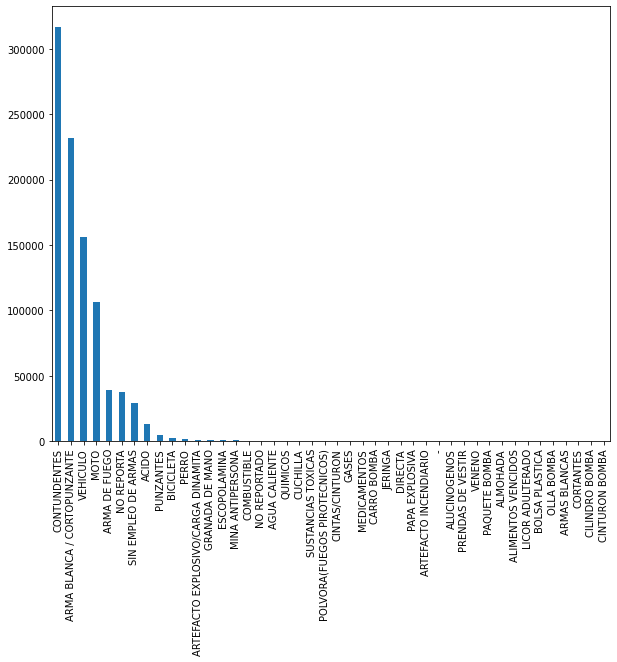

In [ ]:
# Define the fashion

def mode(dataset):
    frequency = {}

    for value in dataset:
        frequency[value] = frequency.get(value, 0) + 1

    most_frequent = max(frequency.values())

    modes = [key for key, value in frequency.items()
                      if value == most_frequent]

    return modes
#The mode is determined
print("The fashion of the most used weapon :")
print(mode(df_LSYAT["ARMAS MEDIOS"]))
print("FREQUENCY DIAGRAM")
plt.figure(figsize=(10,8))
# Repainting the frequency of positions using a bar chart
df_LSYAT["ARMAS MEDIOS"].value_counts().plot(kind = "bar")

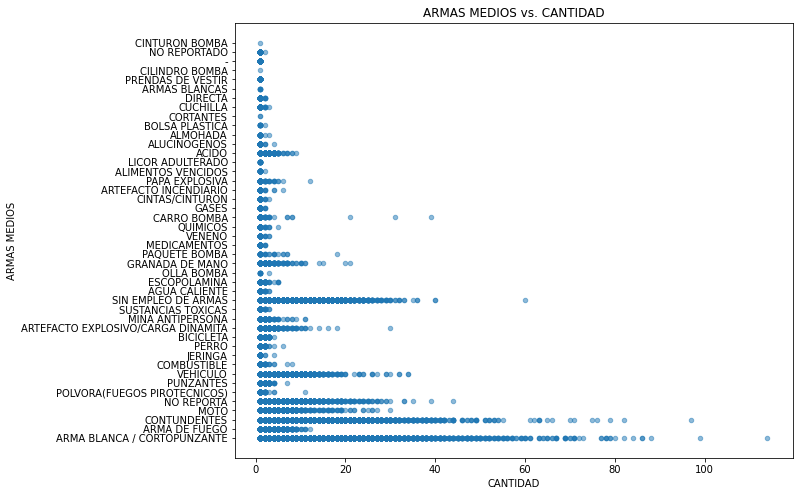

In [ ]:
# Plotting the relationship between QUANTITY and MEANS WEAPONS
plt.figure(figsize=(10,8))
plt.scatter(df_LSYAT["CANTIDAD"], df_LSYAT["ARMAS MEDIOS"],alpha = 0.5,s=20)
plt.title("ARMAS MEDIOS vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("ARMAS MEDIOS")
plt.show()

According to the graphs, it can be seen that the frequency of use in the cases is "STRONG" but if we see it from the comparison of the number of times of the same crime, we can see that the most used weapon is the CUTTING/SHARP WEAPON.

---





Homicides traffic accident National Police


---



The fashion of the most used weapon:
['VEHICULO']
FREQUENCY GRAPH


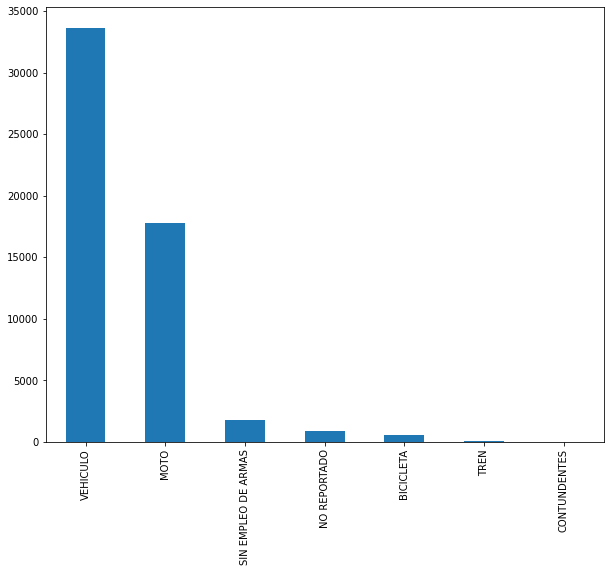

In [ ]:
# Define the fashion

def mode(dataset):
    frequency = {}

    for value in dataset:
        frequency[value] = frequency.get(value, 0) + 1

    most_frequent = max(frequency.values())

    modes = [key for key, value in frequency.items()
                      if value == most_frequent]

    return modes
# The mode is determined
print("The fashion of the most used weapon:")
print(mode(df_HAT["ARMAS MEDIOS"]))

print("FREQUENCY GRAPH")
plt.figure(figsize=(10,8))
# Repainting the frequency of positions using a bar chart
df_HAT["ARMAS MEDIOS"].value_counts().plot(kind = "bar")

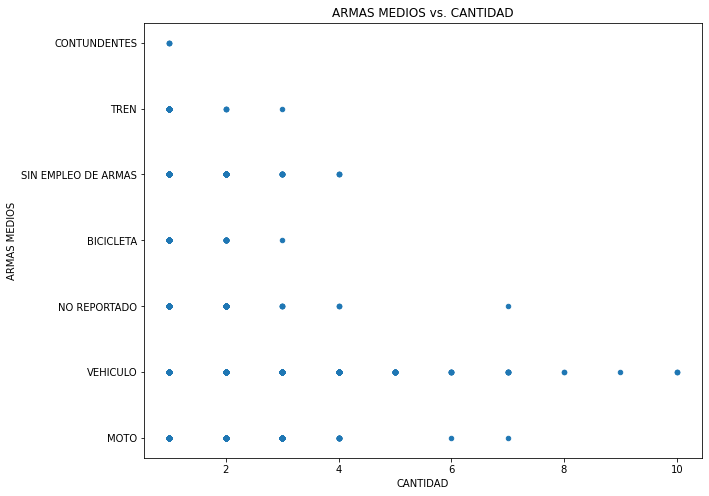

In [ ]:
# Plotting the relationship between QUANTITY and MEANS WEAPONS
plt.figure(figsize=(10,8))
plt.scatter(df_HAT["CANTIDAD"], df_HAT["ARMAS MEDIOS"],s=20)
plt.title("ARMAS MEDIOS vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("ARMAS MEDIOS")
plt.show()

According to the graph, the most used weapon is the VEHICLE


---




### **What is the proportion of genders and age groups that have been involved in this type of crime? Have they changed over the years?**

National Police sexual crimes report

---






GRUPO ETERIO


====================Grupo Eterio====================================


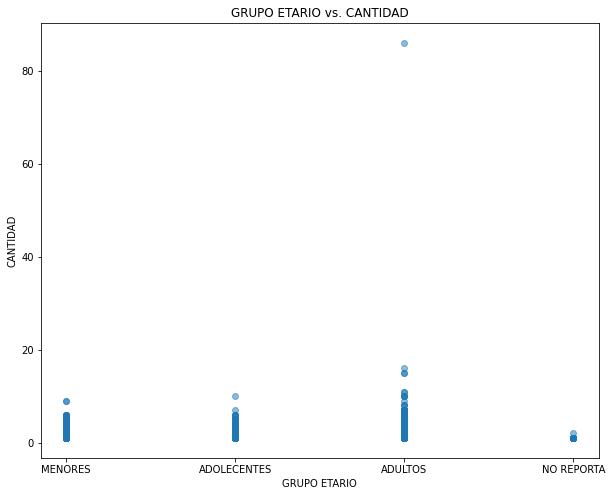

In [ ]:
# Plotting the relationship between the AGE GROUP and the QUANTITY of the player
print("\n====================Grupo Eterio====================================")
plt.figure(figsize=(10,8))
plt.scatter(df_RDS["GRUPO ETARIO"], df_RDS["CANTIDAD"],alpha = 0.5)
plt.title("GRUPO ETARIO vs. CANTIDAD")
plt.xlabel("GRUPO ETARIO")
plt.ylabel("CANTIDAD")
plt.show()

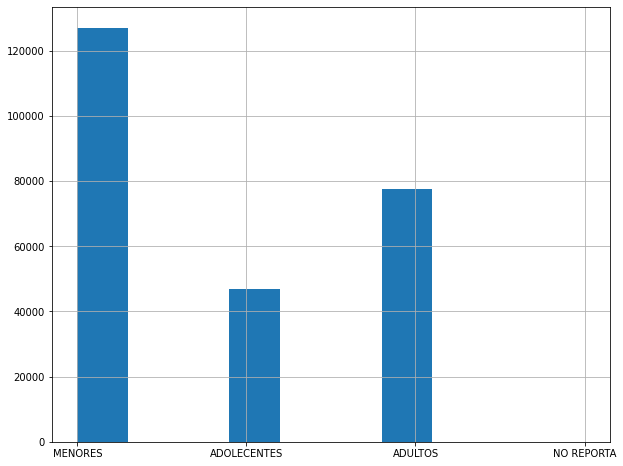

In [ ]:
# Painting the histogram of the age group
plt.figure(figsize=(10,8))
df_RDS["GRUPO ETARIO"].hist()

It can be seen that in the Minors in the histogram it has a greater impact but if we evaluate it from the quantity compared to the age group, it can be seen that the adults of the National Police Sexual Crime Reports have a greater impact.

**GENDER**


====================Genero====================================


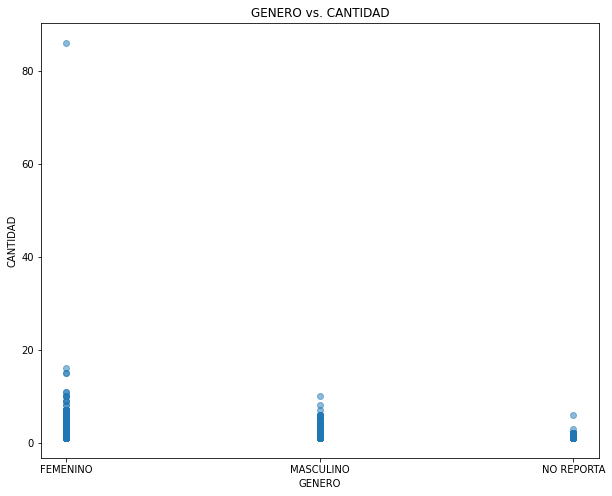

In [ ]:
print("\n====================Genero====================================")
# Graficando la relación entre el GENERO y la CANTIDAD
plt.figure(figsize=(10,8))
plt.scatter(df_RDS["GENERO"], df_RDS["CANTIDAD"],alpha = 0.5)
plt.title("GENERO vs. CANTIDAD")
plt.xlabel("GENERO")
plt.ylabel("CANTIDAD")
plt.show()

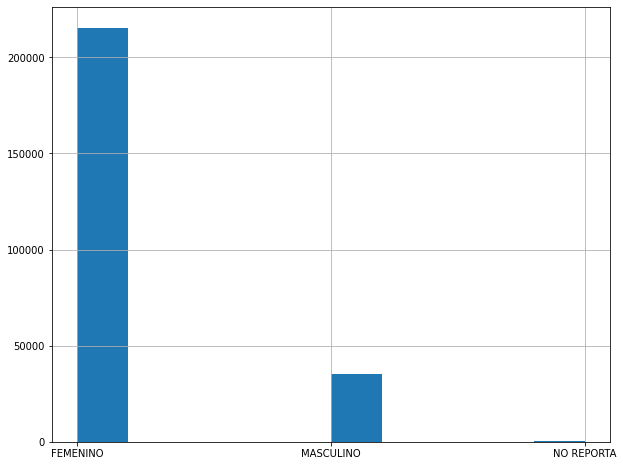

In [ ]:
# Painting the gender histogram
plt.figure(figsize=(10,8))
df_RDS["GENERO"].hist()


It can be seen that the female gender is the one with the most reports of sexual crimes National Police

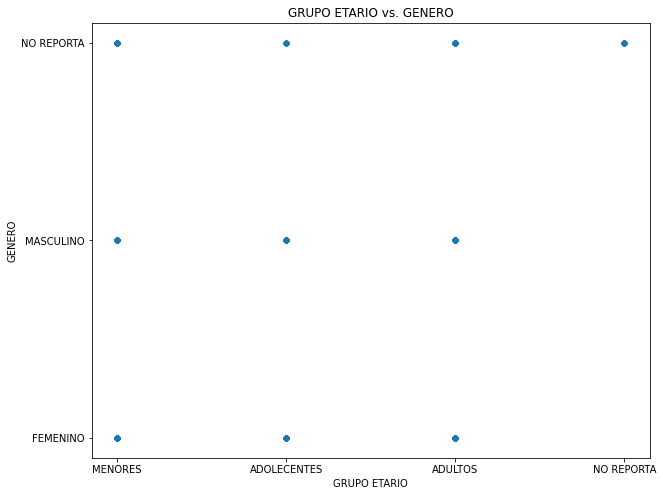

In [ ]:
# Plotting the relationship between GENDER and ETHER GROUP
plt.figure(figsize=(10,8))
plt.scatter(df_RDS["GRUPO ETARIO"], df_RDS["GENERO"],alpha = 0.5,s=20)
plt.title("GRUPO ETARIO vs. GENERO")
plt.xlabel("GRUPO ETARIO")
plt.ylabel("GENERO")
plt.show()

As can be seen, we can see that there is a high relationship
between age group and gender in minors, adolescents and adults



---



Report of personal injuries and a traffic accident

---





GRUPO ETEREO




====================Grupo Eterio====================================
DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARIO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
YEAR                             int64
dtype: object


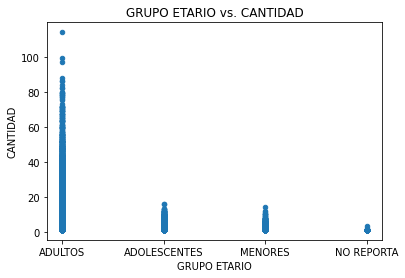

In [ ]:
# Graphing the relationship between QUANTITY and AGE GROUP
print("\n====================Grupo Eterio====================================")
print(df_LSYAT.dtypes)
plt.scatter(df_LSYAT["GRUPO ETARIO"], df_LSYAT["CANTIDAD"],alpha = 1,s=20)
plt.title("GRUPO ETARIO vs. CANTIDAD")
plt.xlabel("GRUPO ETARIO")
plt.ylabel("CANTIDAD")
plt.show()

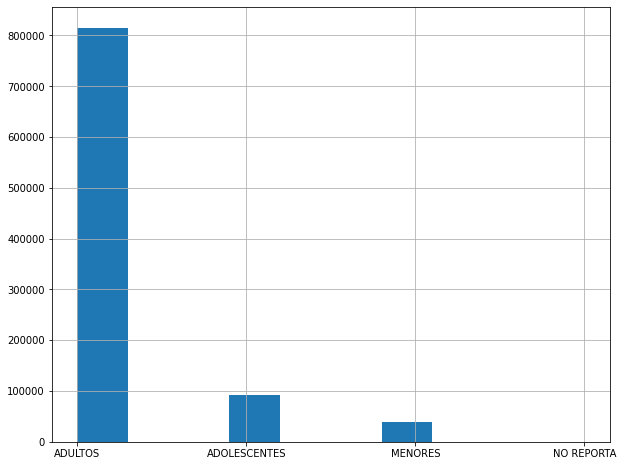

In [ ]:
# Painting the histogram of gender and etheric groups
plt.figure(figsize=(10,8))
df_LSYAT["GRUPO ETARIO"].hist()

It can be seen that in adults there is an increase in reports of Personal Injuries and Traffic Accidents.


GENDER


====================Genero====================================


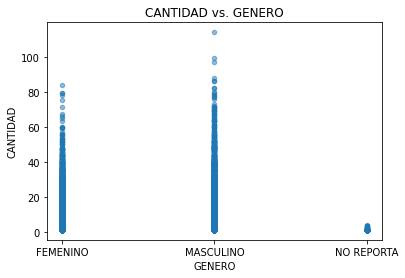

In [ ]:
print("\n====================Genero====================================")
# Graphing the relationship between GENDER and AGE GROUP
plt.scatter(df_LSYAT["GENERO"], df_LSYAT["CANTIDAD"],alpha = 0.5,s=20)
plt.title("CANTIDAD vs. GENERO")
plt.xlabel("GENERO")
plt.ylabel("CANTIDAD")
plt.show()


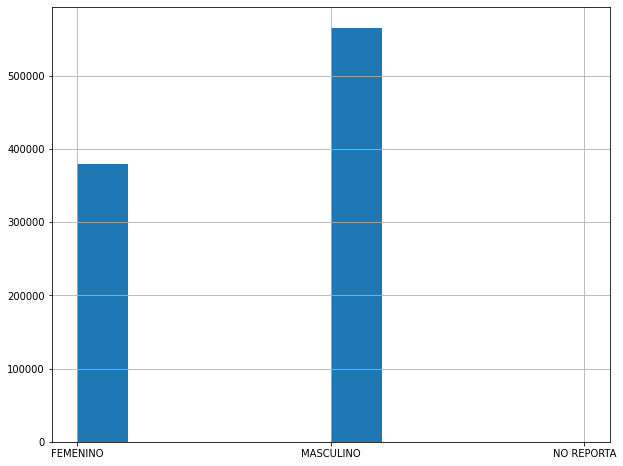

In [ ]:
# Painting the gender histogram
plt.figure(figsize=(10,8))
df_LSYAT["GENERO"].hist()


It can be seen that the male gender is the one with the most reports of Personal Injuries and Traffic Accidents.

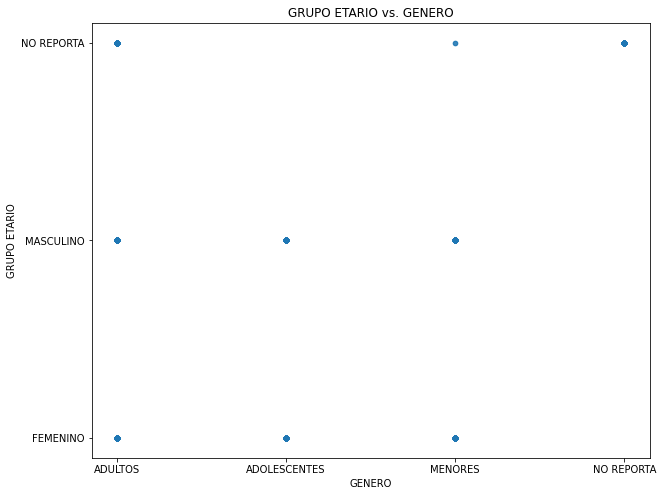

In [ ]:
# Plotting the relationship between GENDER and ETHER GROUP
df_LSYAT = df_LSYAT.dropna()
plt.figure(figsize=(10,8))
plt.scatter(df_LSYAT["GRUPO ETARIO"], df_LSYAT["GENERO"],alpha = 0.5,s=20)
plt.title("GRUPO ETARIO vs. GENERO")
plt.xlabel("GENERO")
plt.ylabel("GRUPO ETARIO")
plt.show()

Adults of any gender and minors have more reports of personal injuries and traffic accidents.

---




Homicides traffic accident National Police


---







GRUPO ETEREO


====================Grupo Eterio====================================


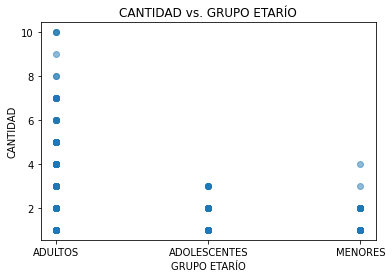

In [ ]:
# Plotting the relationship between QUANTITY and AGE GROUP
print("\n====================Grupo Eterio====================================")
plt.scatter(df_HAT["GRUPO ETARÍO"], df_HAT["CANTIDAD"],alpha = 0.5)
plt.title("CANTIDAD vs. GRUPO ETARÍO")
plt.xlabel("GRUPO ETARÍO")
plt.ylabel("CANTIDAD")
plt.show()

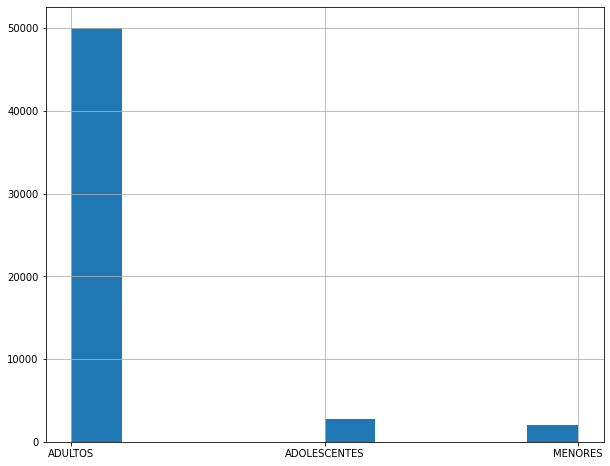

In [ ]:
# Painting the histogram of gender and etheric groups
plt.figure(figsize=(10,8))
df_HAT["GRUPO ETARÍO"].hist()

It can be seen that in adults there is an increase in Homicides traffic accident National Police.

GENDER


====================Genero====================================


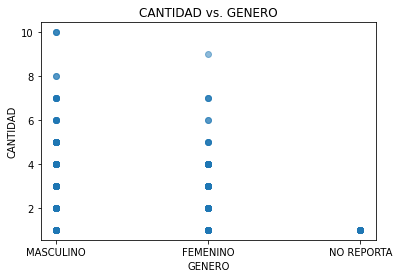

In [ ]:
print("\n====================Genero====================================")
# Plotting the relationship between QUANTITY and GENDER
plt.scatter(df_HAT["GENERO"], df_HAT["CANTIDAD"],alpha = 0.5)
plt.title("CANTIDAD vs. GENERO")
plt.xlabel("GENERO")
plt.ylabel("CANTIDAD")
plt.show()

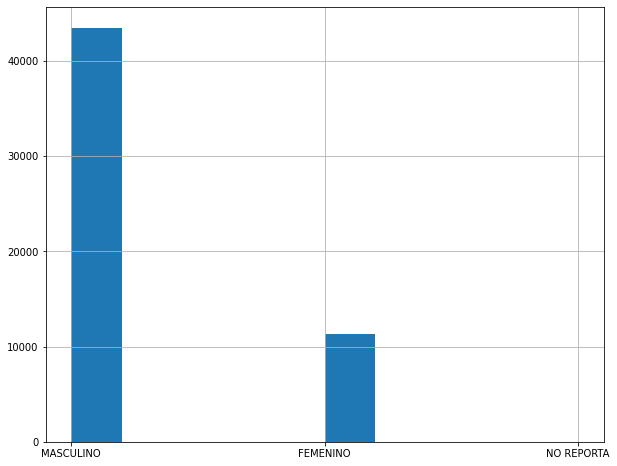

In [ ]:
plt.figure(figsize=(10,8))
df_HAT["GENERO"].hist()
# Pintando el histograma del genero

It can be seen that the male gender is the one with the most Homicides traffic accident National Police


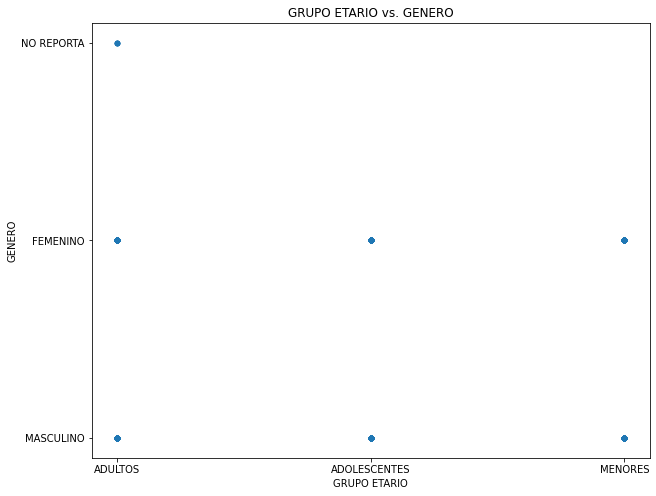

In [ ]:
# Plotting the relationship between GENDER and ETHER GROUP
df_LSYAT = df_LSYAT.dropna()
plt.figure(figsize=(10,8))
plt.scatter(df_HAT["GRUPO ETARÍO"], df_HAT["GENERO"],alpha = 0.5,s=20)
plt.title("GRUPO ETARIO vs. GENERO")
plt.xlabel("GRUPO ETARIO")
plt.ylabel("GENERO")
plt.show()

It is determined that both men and women regardless of their age have a higher number of Homicides traffic accident National Police


---



### **Is there any evidence of a tendency to commit said crime in any particular month of the year?**


National Police sexual crimes report


---



--------------------------------- MONTH -------------------------------------


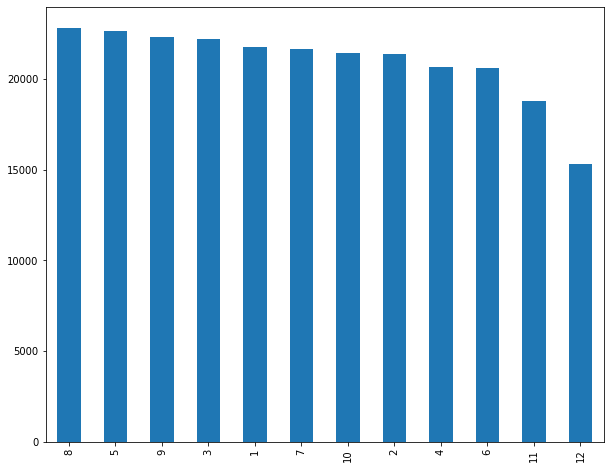

In [ ]:
print("--------------------------------- MONTH -------------------------------------")
# I create a year column and enter MONTH to be able to take them easier
df_RDS["MONTH"]=pd.DatetimeIndex(df_RDS["FECHA HECHO"]).month
plt.figure(figsize=(10,8))
# Repainting the frequency of positions using a bar chart
df_RDS["MONTH"].value_counts().plot(kind = "bar")


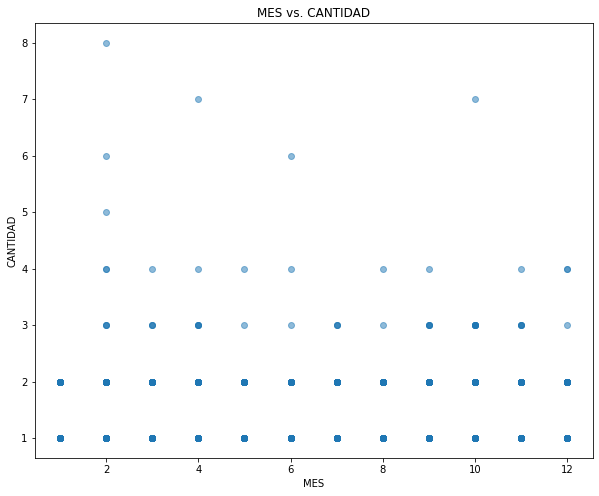

In [ ]:
plt.figure(figsize=(10,8))
# Generate a list with only the year 2020
df_RDS2020 = df_RDS.loc[df_RDS["YEAR"] == 2020]
# Plotting the relationship between QUANTITY and MONTH
plt.scatter(df_RDS2020["MONTH"], df_RDS2020["CANTIDAD"],alpha = 0.5)
plt.title("MES vs. CANTIDAD")
plt.xlabel("MES")
plt.ylabel("CANTIDAD")
plt.show()

It was determined that the month in which the most crime was committed in the year 2020 was 2 with respect to the amount and in the frequency table it was month 8.


---



Report of personal injuries and a traffic accident


---



--------------------------------- MONTH -------------------------------------


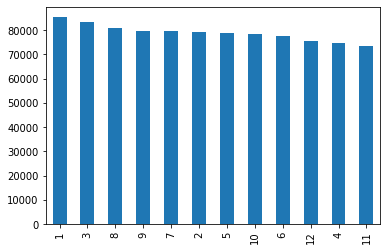

In [ ]:
print("--------------------------------- MONTH -------------------------------------")
# I create a year column and enter MONTH to be able to take them easier
df_LSYAT["MONTH"]=pd.DatetimeIndex(df_LSYAT["FECHA HECHO"]).month
# Repainting the frequency of positions using a bar chart
df_LSYAT["MONTH"].value_counts().plot(kind = "bar")

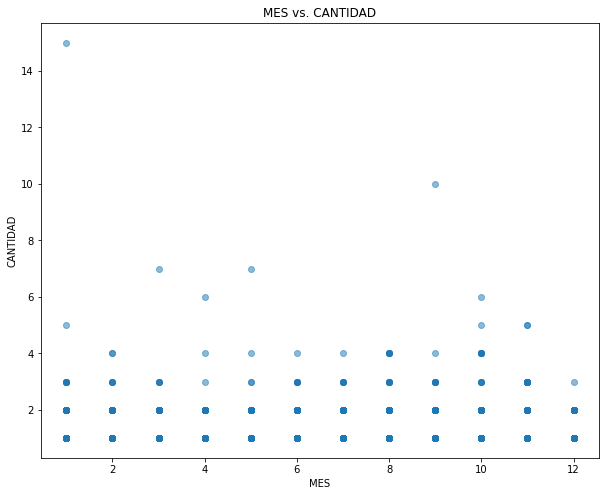

In [ ]:
plt.figure(figsize=(10,8))
# Generate a list with only the year 2020
df_LSYAT2020 = df_LSYAT.loc[df_LSYAT["YEAR"] == 2020]
# Plotting the relationship between QUANTITY and MONTH
plt.scatter(df_LSYAT2020["MONTH"], df_LSYAT2020["CANTIDAD"],alpha = 0.5)
plt.title("MES vs. CANTIDAD")
plt.xlabel("MES")
plt.ylabel("CANTIDAD")
plt.show()

As can be seen, month 1 was the month in which the crime of Report of personal injuries and a traffic accident was committed the most.


---




Homicides traffic accident National Police


---



--------------------------------- MONTH -------------------------------------


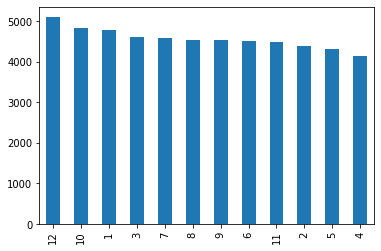

In [ ]:
print("--------------------------------- MONTH -------------------------------------")
# I create a year column and enter MONTH to be able to take them easier
df_HAT["MONTH"]=pd.DatetimeIndex(df_HAT["FECHA HECHO"]).month
# Repainting the frequency of positions using a bar chart
df_HAT["MONTH"].value_counts().plot(kind = "bar")

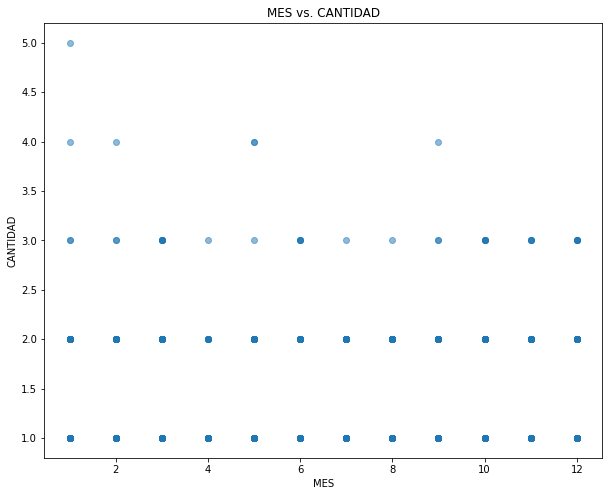

In [ ]:
plt.figure(figsize=(10,8))
# Generate a list with only the year 2020
df_HAT2020 = df_HAT.loc[df_HAT["YEAR"] == 2020]
# Plotting the relationship between QUANTITY and MONTH
plt.scatter(df_HAT2020["MONTH"], df_HAT2020["CANTIDAD"],alpha = 0.5)
plt.title("MES vs. CANTIDAD")
plt.xlabel("MES")
plt.ylabel("CANTIDAD")
plt.show()

It was determined that the month in which the most crime was committed in the year 2020 was 12 with respect to the amount and in the frequency table it was month 1.

---




### **For cases in which the details of the crime or a description are available, such as sexual crimes and kidnapping, what are the most common crimes, descriptions or modalities?**

National Police sexual crimes report

---



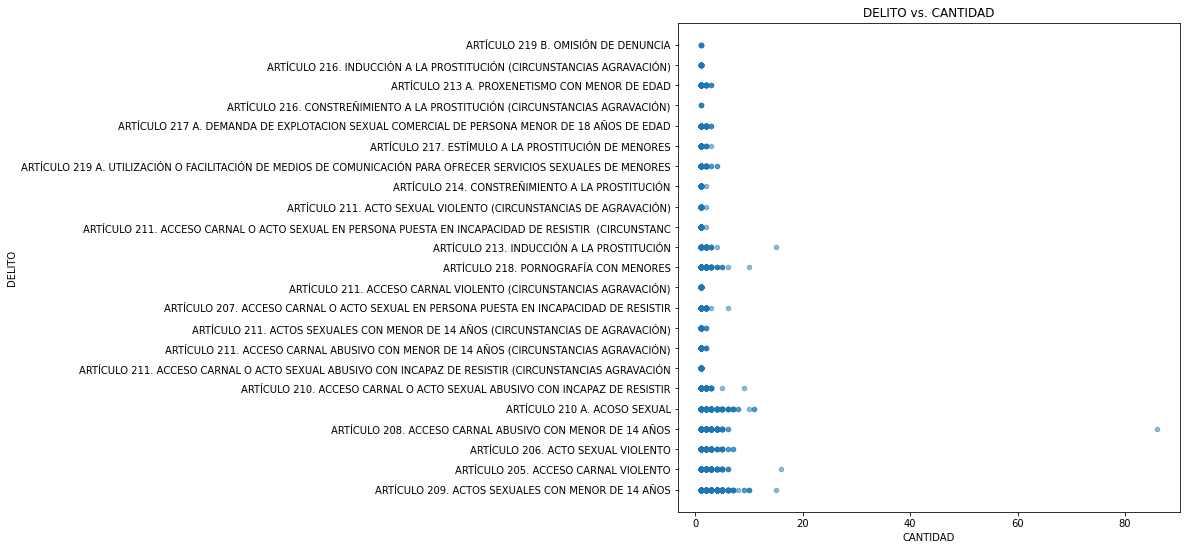

In [ ]:
# Plotting the relationship between quantity description and crime
plt.figure(figsize=(9,9))
plt.scatter(df_RDS["CANTIDAD"], df_RDS["delito"],alpha = 0.5,s=20)
plt.title("DELITO vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DELITO")
plt.show()

It can be noted that one of the most cataloged crimes is article 210. Sexual harassment and the last one is Article 208. Abusive carnal access with minors under 14 years of age.




Report of personal injuries and a traffic accident

---



   DEPARTAMENTO           MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0       CAQUETÁ              SOLANO     18756000  ARMA BLANCA / CORTOPUNZANTE   
1       BOLÍVAR      CARTAGENA (CT)     13001000  ARMA BLANCA / CORTOPUNZANTE   
2         HUILA            LA PLATA     41396000  ARMA BLANCA / CORTOPUNZANTE   
3     SANTANDER         PIEDECUESTA     68547000                 CONTUNDENTES   
4          META  VILLAVICENCIO (CT)     50001000                 CONTUNDENTES   
5       BOLÍVAR      CARTAGENA (CT)     13001000                 CONTUNDENTES   
6  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   
7        BOYACÁ                PAYA     15533000                 CONTUNDENTES   
8  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   
9  CUNDINAMARCA    BOGOTÁ D.C. (CT)     11001000                 CONTUNDENTES   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  \
0  2010-01-01   FEMENINO      MENORES         1   
1  201

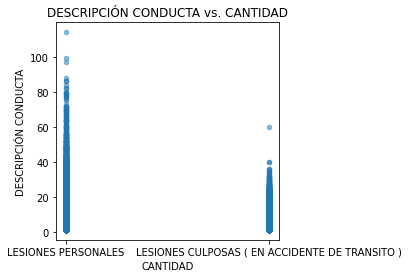

In [ ]:
# Plotting the relationship between quantity description and behavior description
plt.figure(figsize=(4,4))
# Printing the first 10 records
print(df_RDS.head(10))
plt.scatter(df_LSYAT["DESCRIPCIÓN CONDUCTA"], df_LSYAT["CANTIDAD"],alpha = 0.5,s=20)
plt.title("DESCRIPCIÓN CONDUCTA vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DESCRIPCIÓN CONDUCTA")
plt.show()

As you can see personal injury is the most used argument.


Homicides traffic accident National Police





---



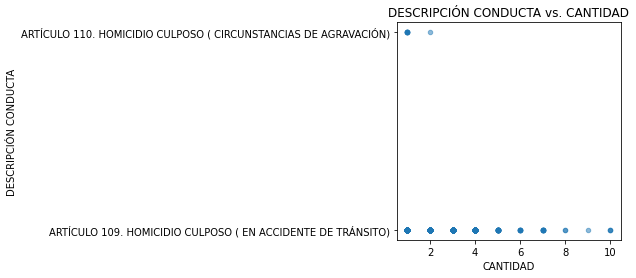

In [ ]:
# Plotting the relationship between the description of the behavior description and the quantity
plt.figure(figsize=(4,4))
plt.scatter(df_HAT["CANTIDAD"], df_HAT["DESCRIPCIÓN CONDUCTA"],alpha = 0.5,s=20)
plt.title("DESCRIPCIÓN CONDUCTA vs. CANTIDAD")
plt.xlabel("CANTIDAD")
plt.ylabel("DESCRIPCIÓN CONDUCTA")
plt.show()

As we can see the causes for which more people die from vehicles are Article 109. Wrongful death (IN TRAFFIC ACCIDENT).

---




**DATA ERRORS**

---



* It was found that the size of the document was so large that it runs locally, it was a way of suffocating the computer and it did not fully render.

* Incomplete columns were found where I had to apply row deletion functions so that those rows could be executed.

* Different accents were identified that could not be corrected because the functions could not send to a flat format and damaged the mouth of the format.

* The use of lower and upper case letters was found to be incongruous with the tables, which used an APCASE format so that they would all remain capital letters.

* Some data sets had data with little information on where the crime was committed, but the complete information was not recorded, which loaded the data as "NO REPORTS" were not considered because for the analysis, this affected it by not knowing the municipality and other important data.

* The categories are poorly written, generating an erroneous analysis due to poor writing, as happens with "ADOLESCENTS" and "ADOLESCENTS"

